# Problem Statement
A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia which is provided in file 'train.csv'.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, _determine the optimal value of lambda for ridge and lasso regression_. 

### Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

> We will perform the regression by going through below processes:
1. Data Understanding, Loading and Exploration
2. Data Cleansing
3. Data Preparation
4. Model Building and Evaluation

Step 1. Data Understanding, Loading and Exploration.

Let's first have a look at the data that we've got and understand some basic details on the schema of the data and necessary checks on them.

In [85]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

#we will also set display options to see entire rows and columns within 
#let's set display to get all rows and columns 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)


In [86]:
housing_data = pd.read_csv('train.csv')
housing_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [87]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Clearly the data has **1460** rows and **81** columns.

In [88]:
# checking for null values
(housing_data.isnull().sum()/housing_data.isnull().count()*100).sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

We can either **impute** or **drop** some columns with high percentage of null values as we could see.<br>
dropping the columns which has null percentage of more than say **40%**.

In [89]:
dropped_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']# Tracking dropped cols
housing_data.drop(dropped_cols, axis=1, inplace=True)
(housing_data.isnull().sum()/housing_data.isnull().count()*100).sort_values(ascending=False).head(15)
# LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,
# BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond

#13 cols to look at

MasVnrType      59.726027
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
PavedDrive       0.000000
dtype: float64

In [90]:
housing_data[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()# numerical cols with missing values

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [91]:
# can see outlier in variable 'LotFrontage' & 'MasVnrArea' so imputing with median.
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(),inplace=True)
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median(),inplace=True)
# No outlier in 'GarageYrBlt' imputing with the mean.
housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].mean(),inplace=True)


<Axes: xlabel='GarageYrBlt', ylabel='Count'>

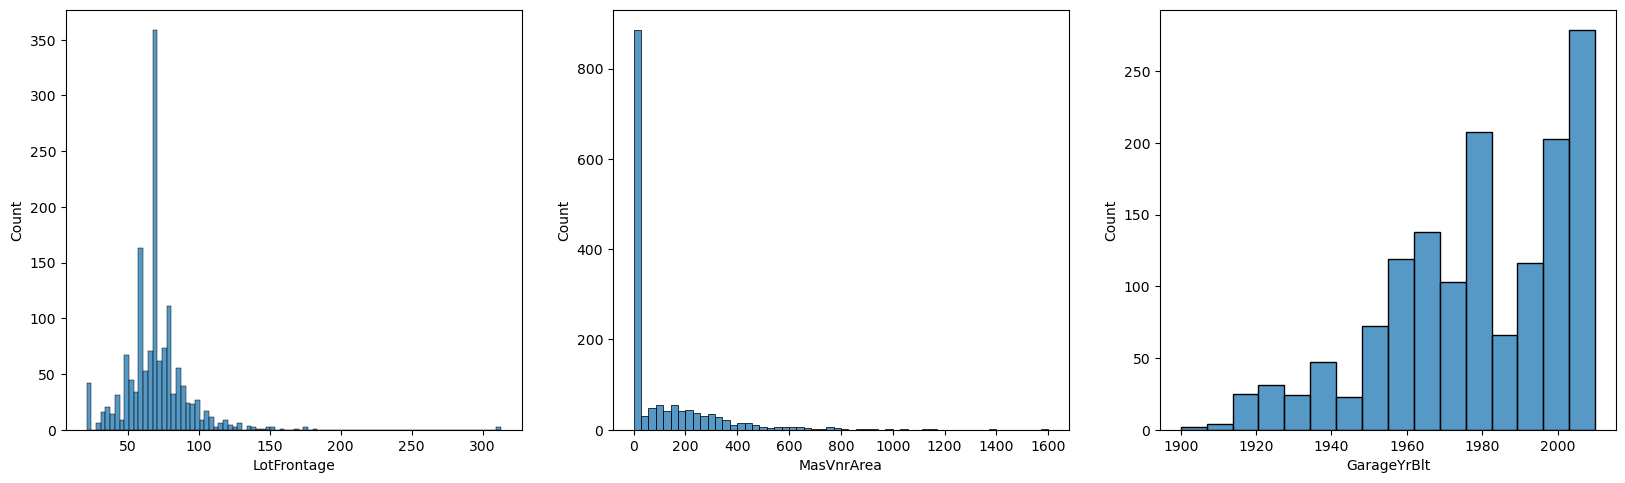

In [92]:
# lets us visualize the numerical cols now
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.histplot(housing_data['LotFrontage'])
plt.subplot(2,3,2)
sns.histplot(housing_data['MasVnrArea'])
plt.subplot(2,3,3)
sns.histplot(housing_data['GarageYrBlt'])

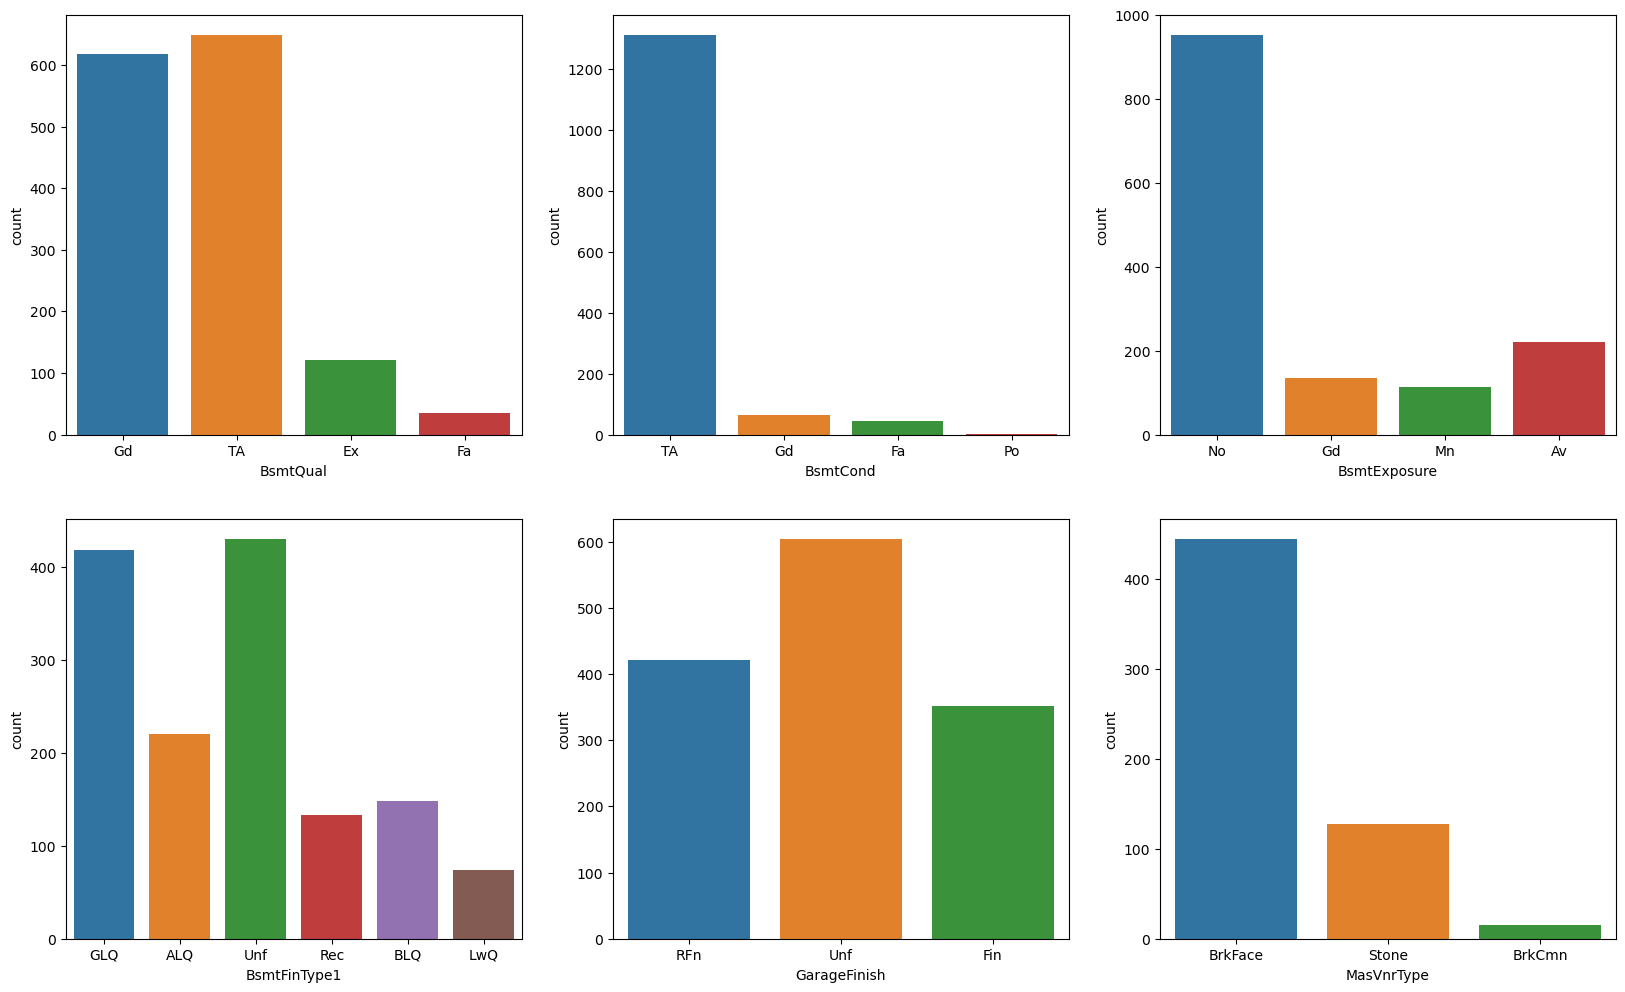

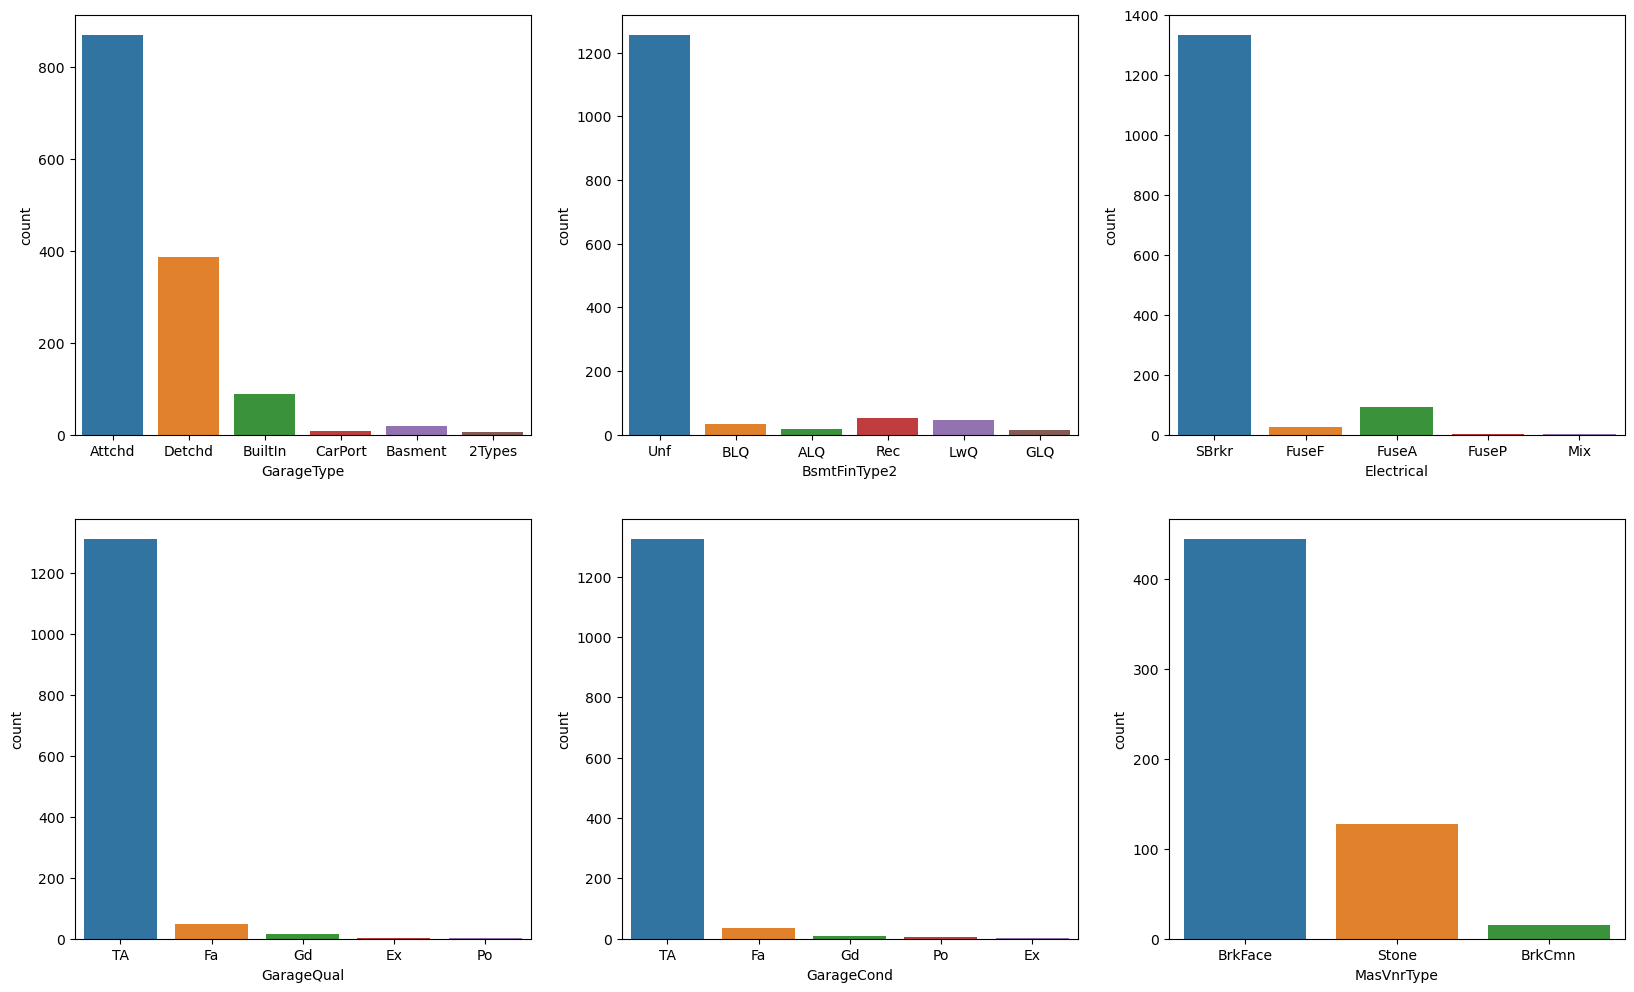

In [93]:
def categoryvisualization(data):
    plt.figure(figsize=(20, 12))
    j=1
    for i in range(len(data)):
        plt.subplot(2,3,j)
        sns.countplot(x = data[i], data = housing_data)
        j+=1
    plt.show()

categoryvisualization(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','GarageFinish','MasVnrType'])
categoryvisualization(['GarageType','BsmtFinType2','Electrical','GarageQual','GarageCond','MasVnrType'])

In [94]:
# Cases when the house doesn't have the garrage so replacing null with No Garrage

housing_data['GarageType'] = housing_data['GarageType'].replace(np.nan, 'No Garage')
housing_data['GarageFinish'] = housing_data['GarageFinish'].replace(np.nan, 'No Garage')
housing_data['GarageCond'] = housing_data['GarageCond'].replace(np.nan, 'No Garage')
housing_data['GarageQual'] = housing_data['GarageQual'].replace(np.nan, 'No Garage')
housing_data['MasVnrType'] = housing_data['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
housing_data['Electrical'] = housing_data['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

In [95]:
#changing num to categorical so as to form these as dummy variables 
housing_data['MSSubClass']=housing_data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing_data['OverallQual']=housing_data['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing_data['OverallCond']=housing_data['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [96]:
# Cases when the house doesn't have the basement so replacing null with No Basement

housing_data['BsmtExposure'] = housing_data['BsmtExposure'].replace(np.nan, 'No Basement')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].replace(np.nan, 'No Basement')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].replace(np.nan, 'No Basement')
housing_data['BsmtCond'] = housing_data['BsmtCond'].replace(np.nan, 'No Basement')
housing_data['BsmtQual'] = housing_data['BsmtQual'].replace(np.nan, 'No Basement')


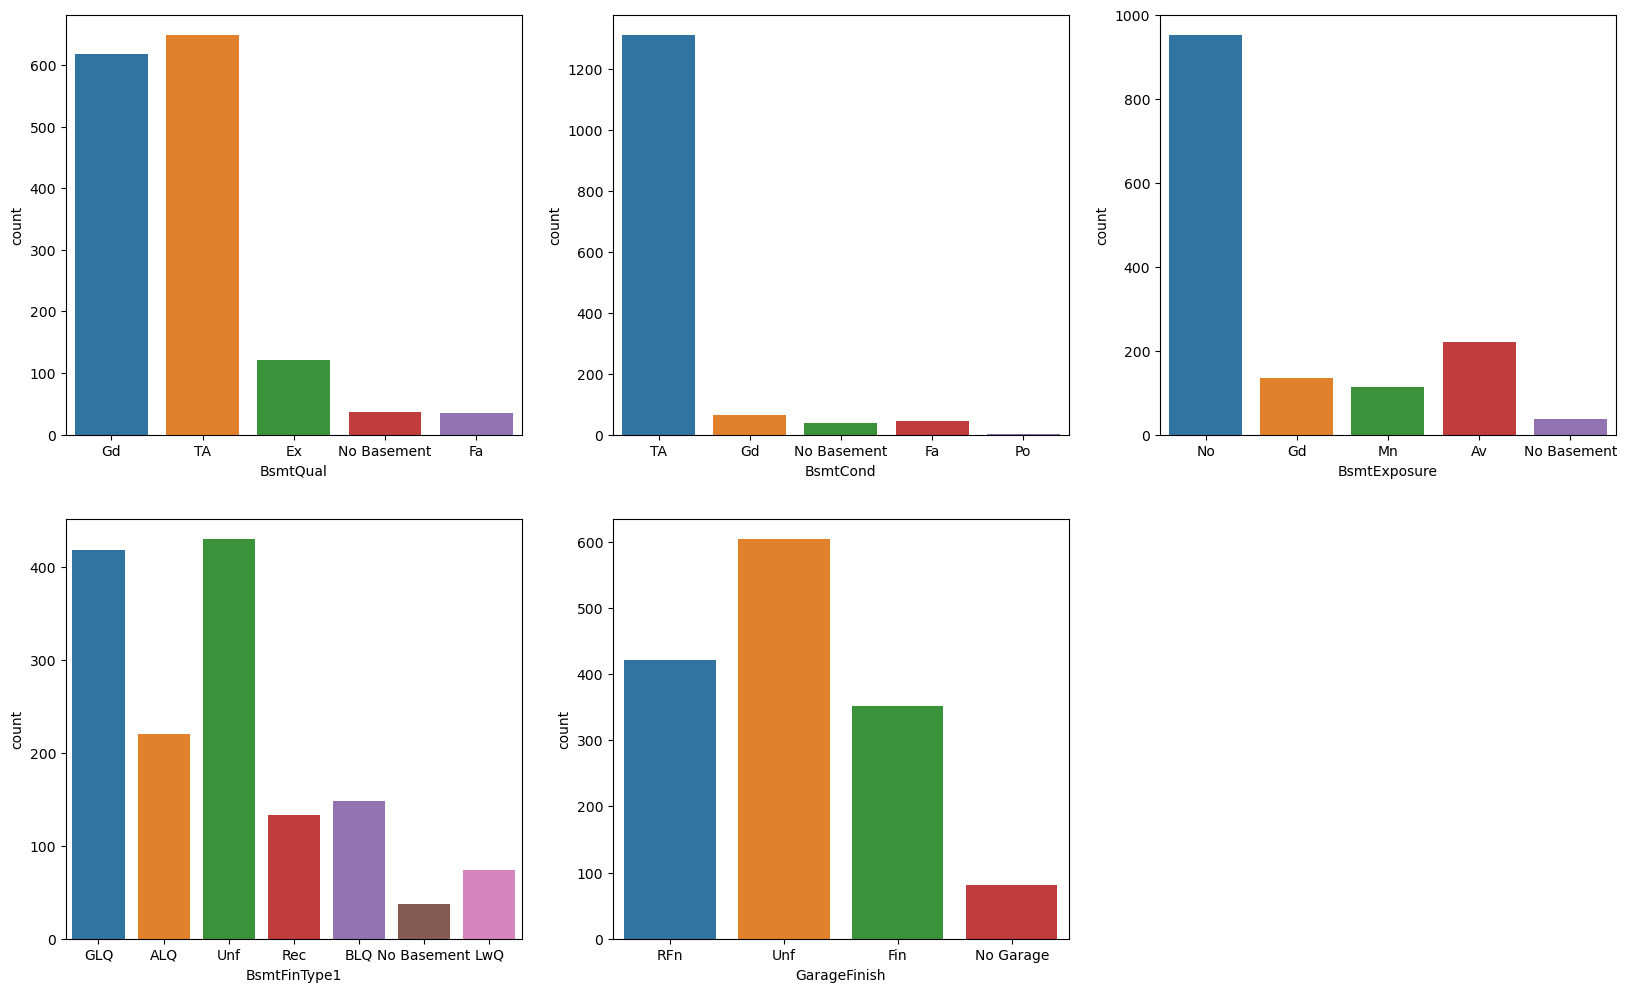

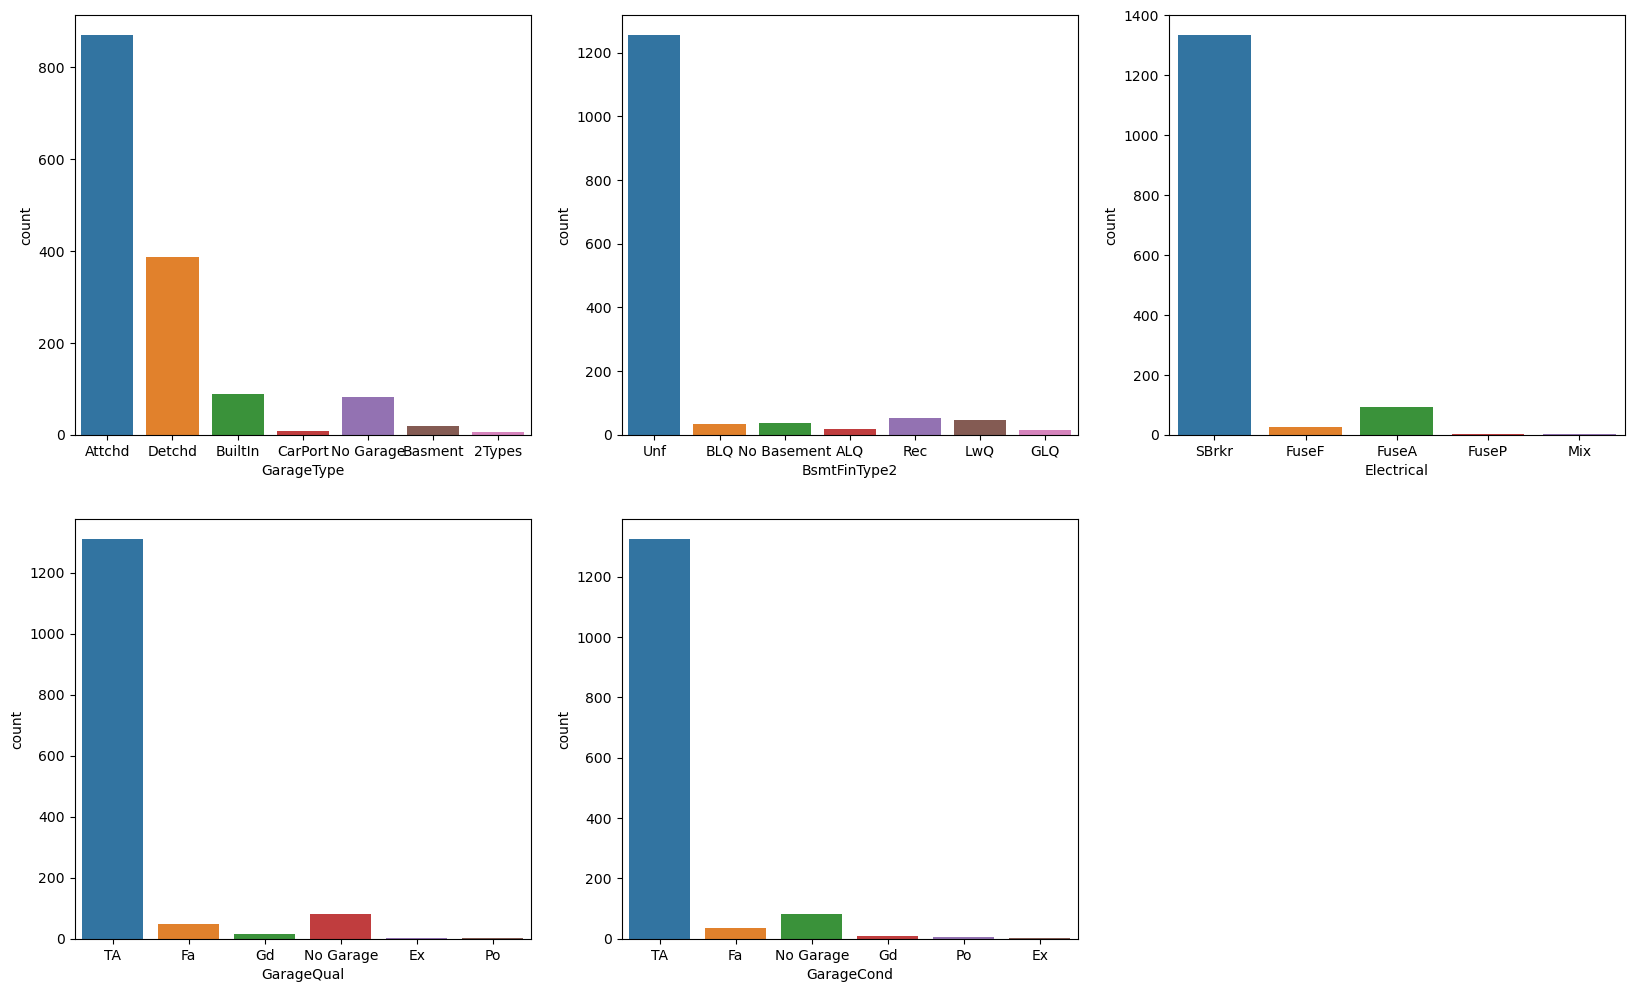

In [97]:
categoryvisualization(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','GarageFinish'])
categoryvisualization(['GarageType','BsmtFinType2','Electrical','GarageQual','GarageCond'])

In [98]:
# now that we have imputed and completed with missing value treatment and converted categorical col to numerical
#Let's check the dependent variable i.e SalePrice

#descriptive statistics summary
housing_data['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

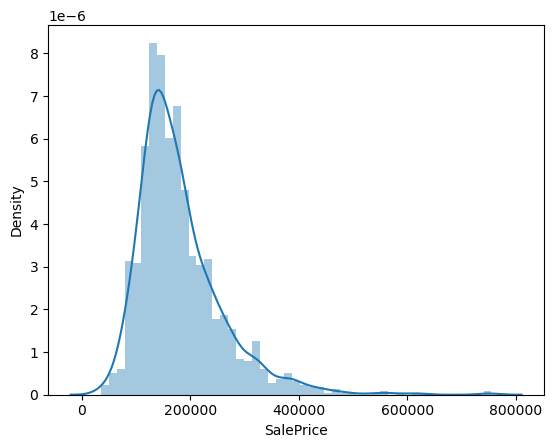

In [99]:
sns.distplot(housing_data['SalePrice']) #it's skewed 

In [100]:
#skewness and kurtosis
print("Skewness: %f" % housing_data['SalePrice'].skew())

Skewness: 1.882876


In [101]:
housing_data['SalePrice']=np.log(housing_data.SalePrice) #tranforming to form normal disribution

In [102]:
housing_data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

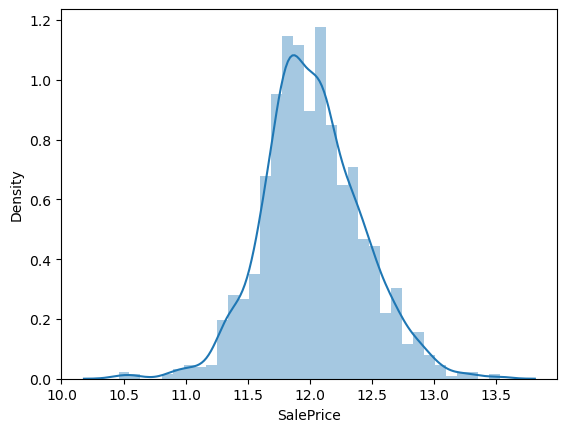

In [103]:
sns.distplot(housing_data['SalePrice']) # Normally distributed now

In [104]:
#skewness 
print("Skewness: %f" % housing_data['SalePrice'].skew())

Skewness: 0.121335


So the dependent variable Salesprice is now normally distributed

In [105]:
# if we check the categororica variable effect on sale price
cat_col = housing_data.select_dtypes(include=['object'])
cat_col.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

as we have many columns so let's make groups randomly and visualize them<br>
we would be making two graphs to understand 
- firstly the countplot and 
- secondaly effect of that variable on dependent variable i.e. SalePrice

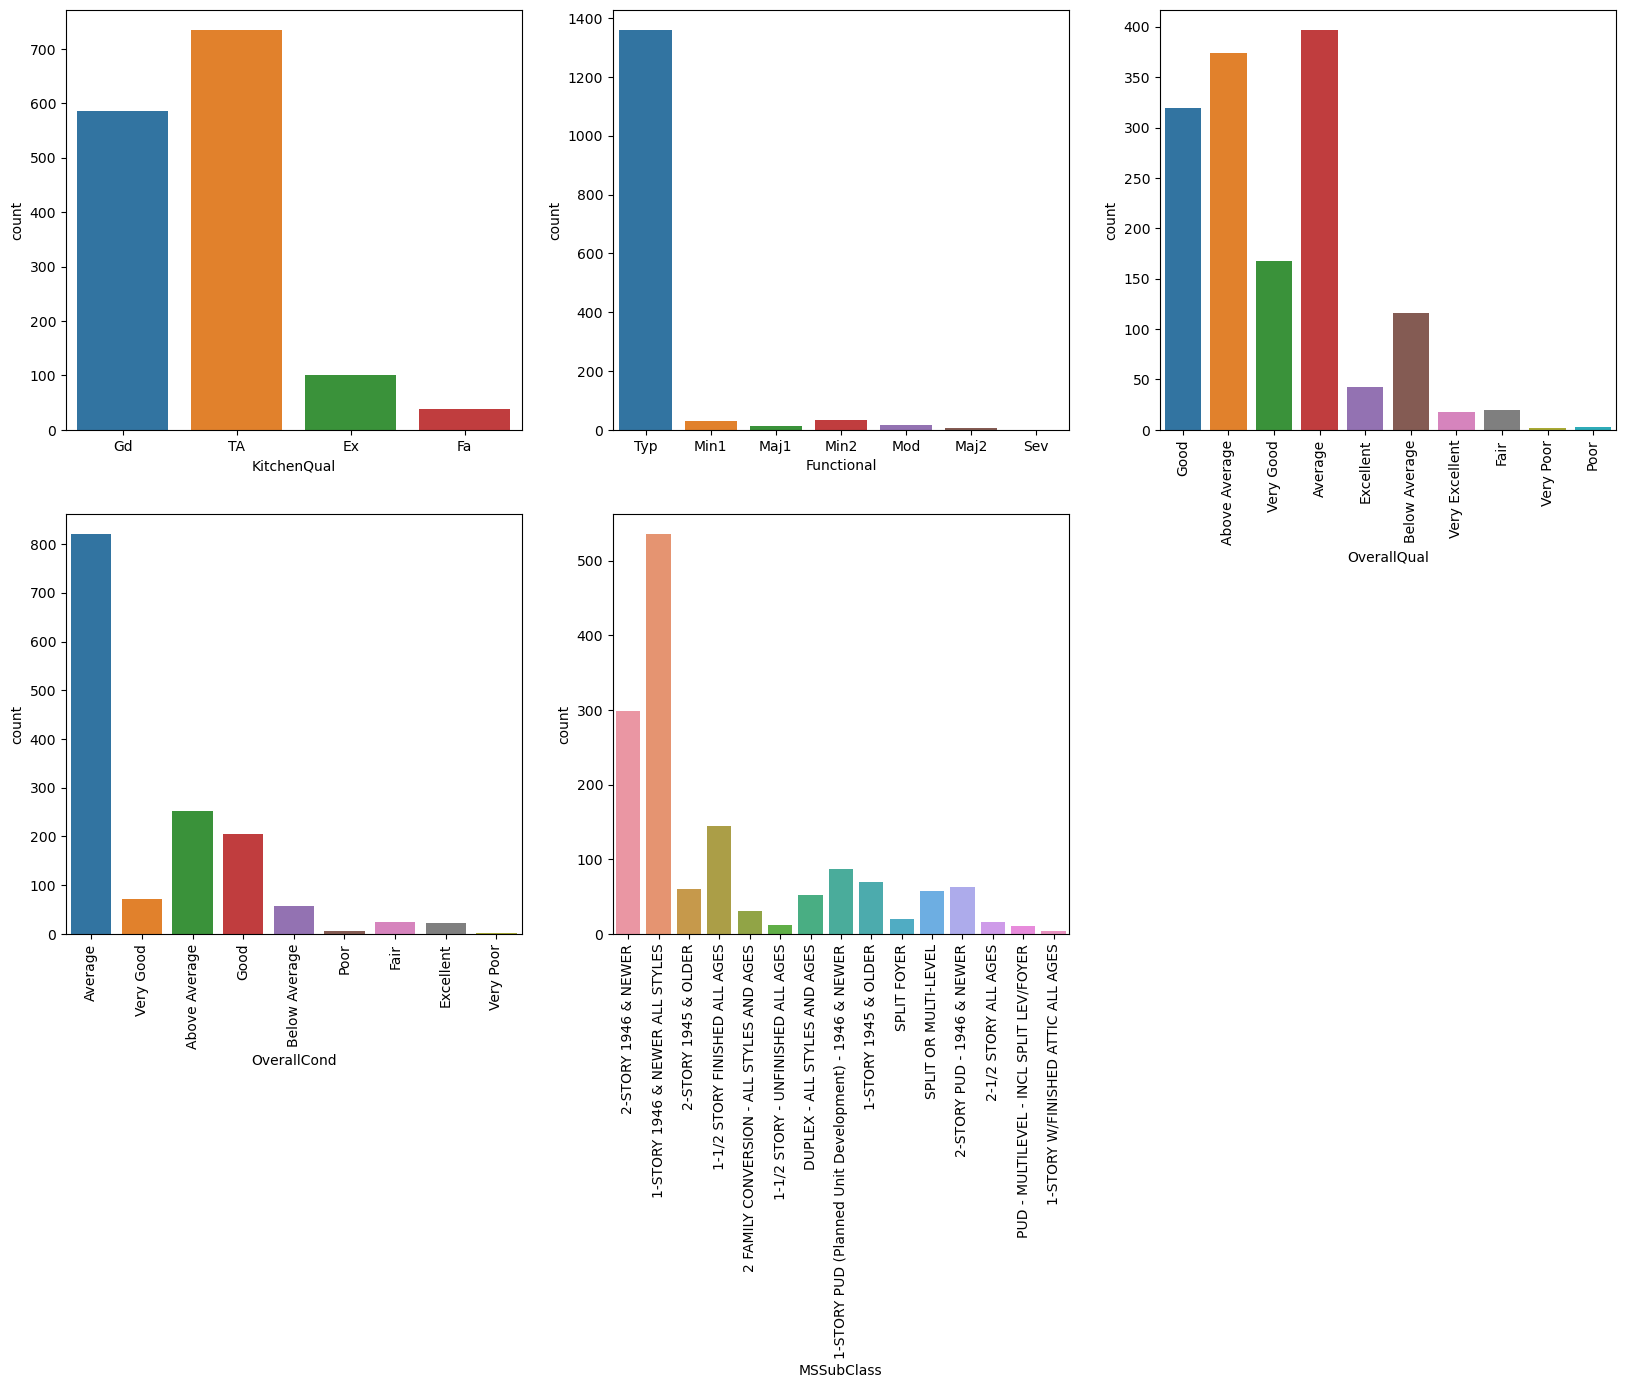

In [106]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = housing_data)
plt.xticks(rotation=90)
plt.show()


In [107]:
housing_data['MSSubClass'].value_counts() # similarly checking other columns for skewness

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

In [108]:
# Dropping highly skewed column 
housing_data.drop(['Functional'],axis=1,inplace=True)

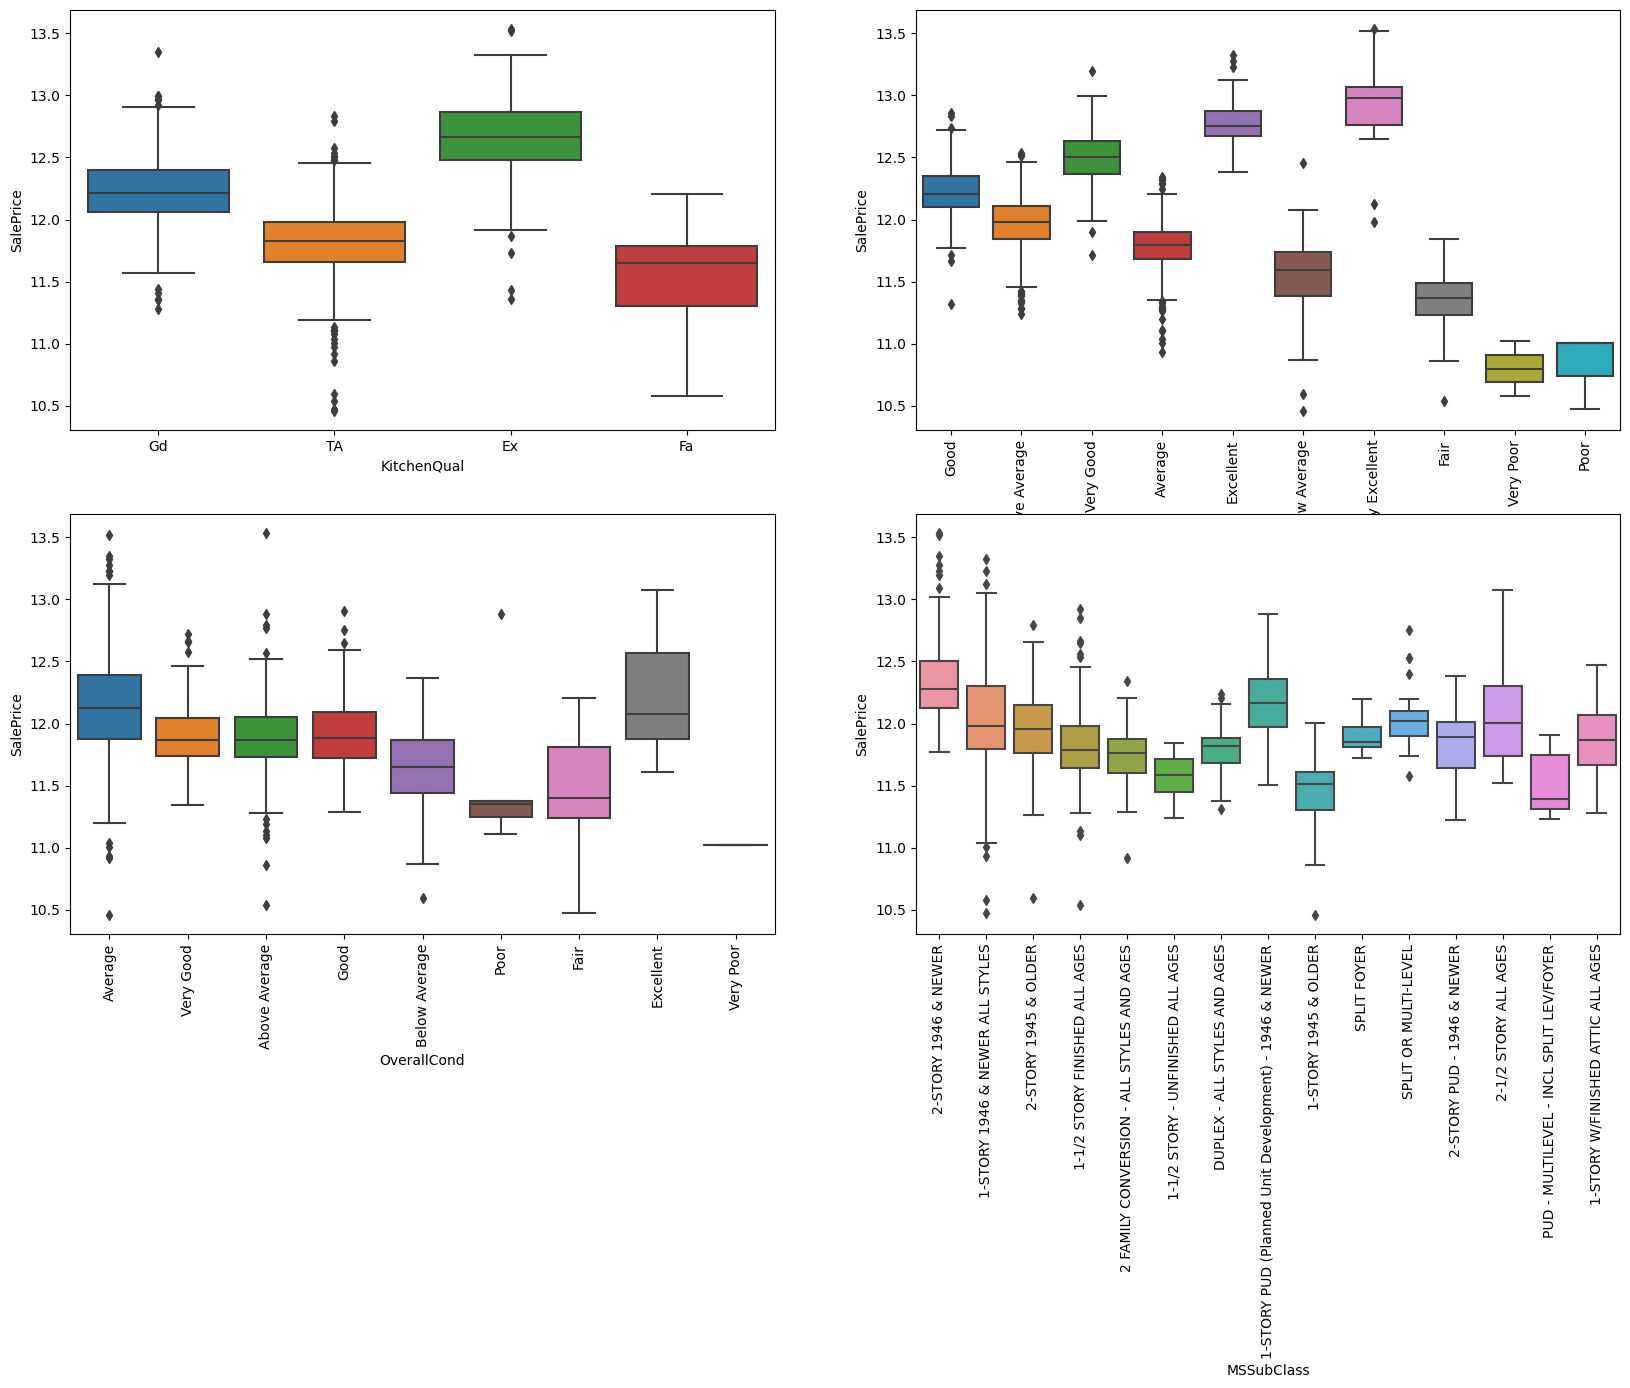

In [109]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = housing_data)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing_data)
plt.xticks(rotation=90)
plt.show()


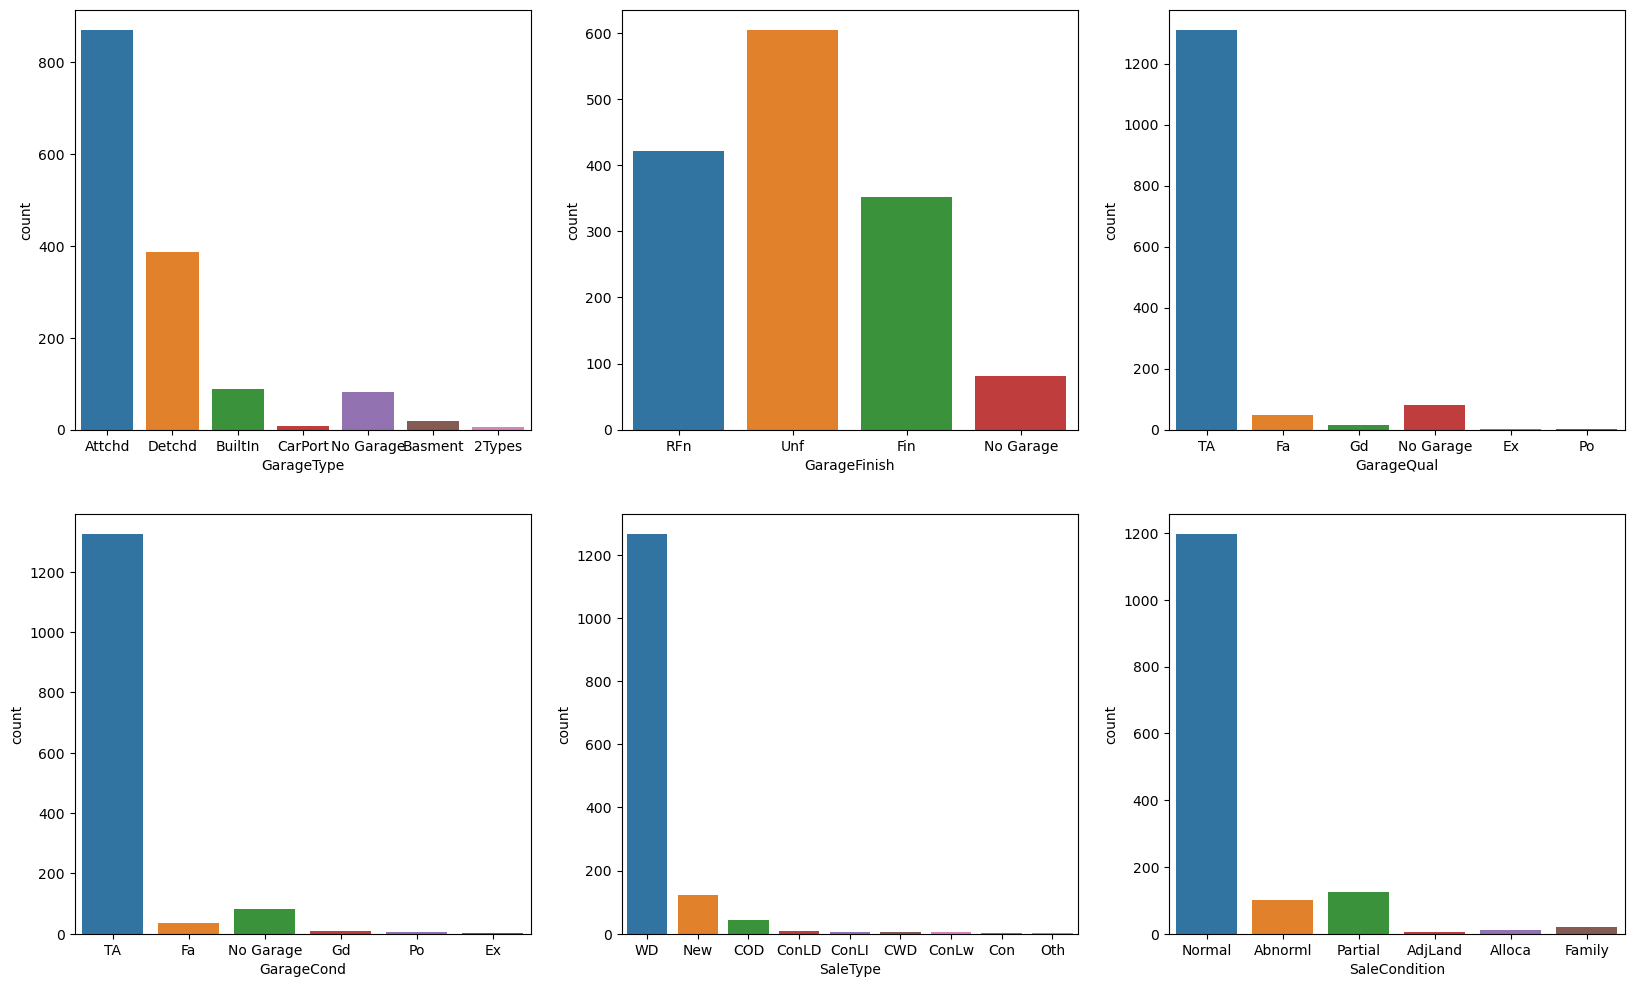

In [110]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing_data)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing_data)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = housing_data)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing_data)
plt.show()


In [111]:
housing_data['SaleCondition'].value_counts() #similarly checking other columns for skewness

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

We can see that in this group except GarageType and GarageFinish almost all are skewed so we can drop these columns.

In [112]:
housing_data['GarageType'] = housing_data['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing_data['SaleCondition'] = housing_data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

# Dropping highly skewed column 
housing_data.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)


<Axes: xlabel='GarageFinish', ylabel='SalePrice'>

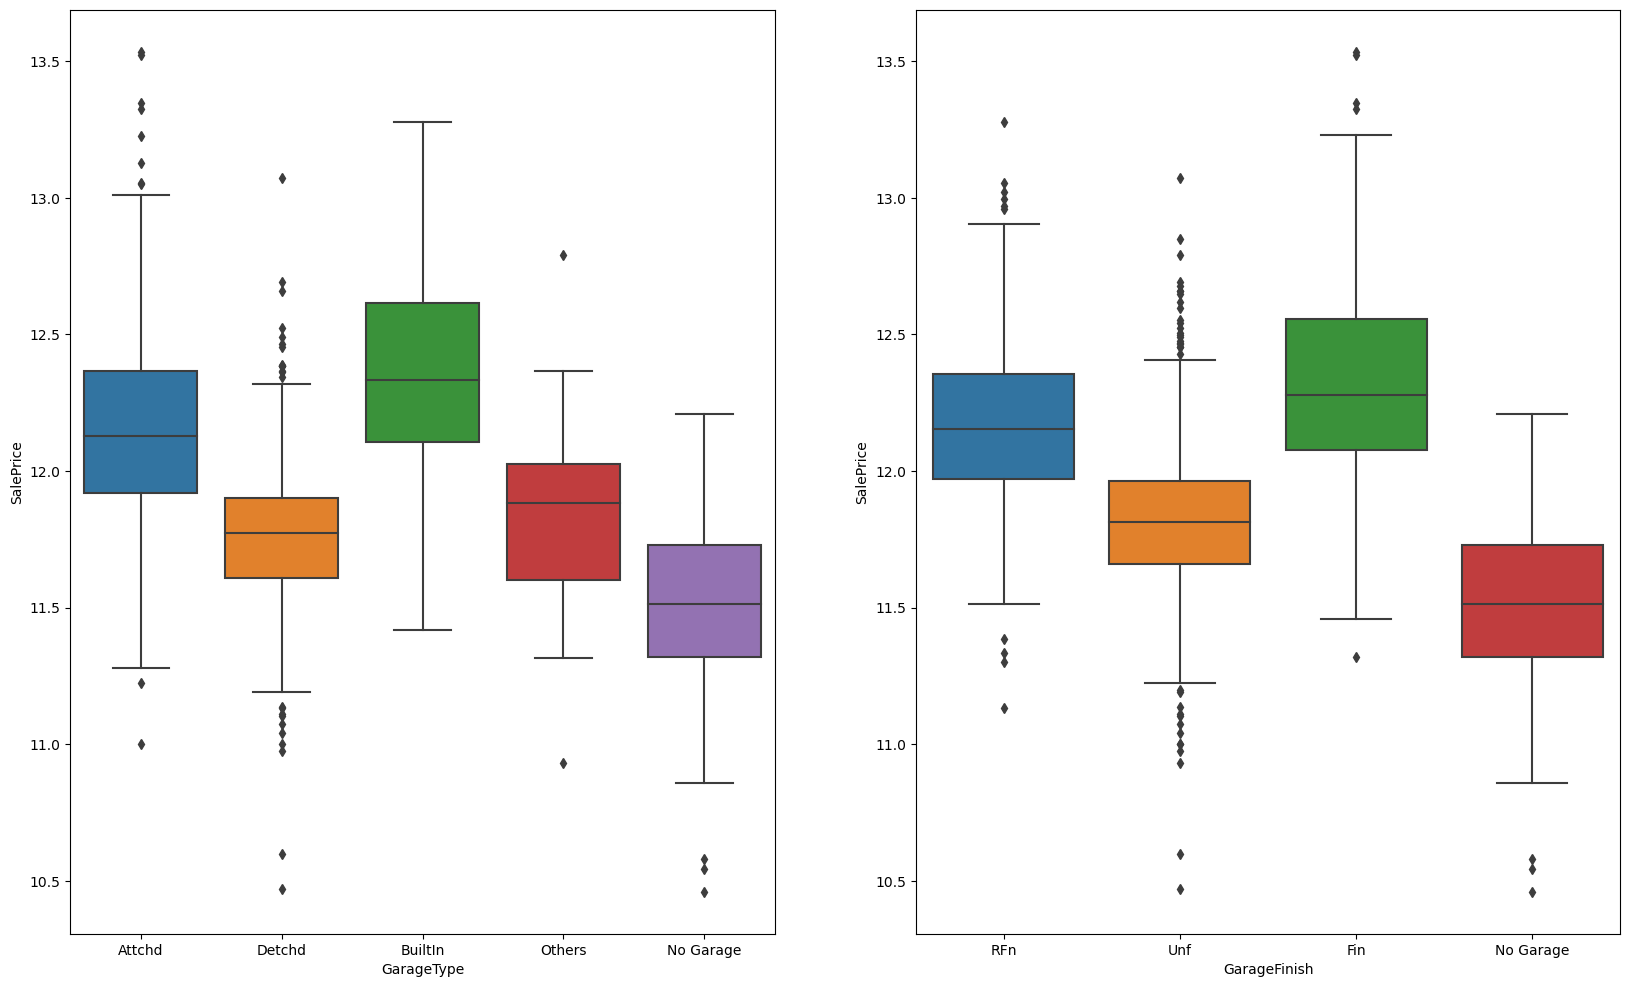

In [113]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = housing_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing_data)


Price of Builtin Garagetype and Finished garage is the highest

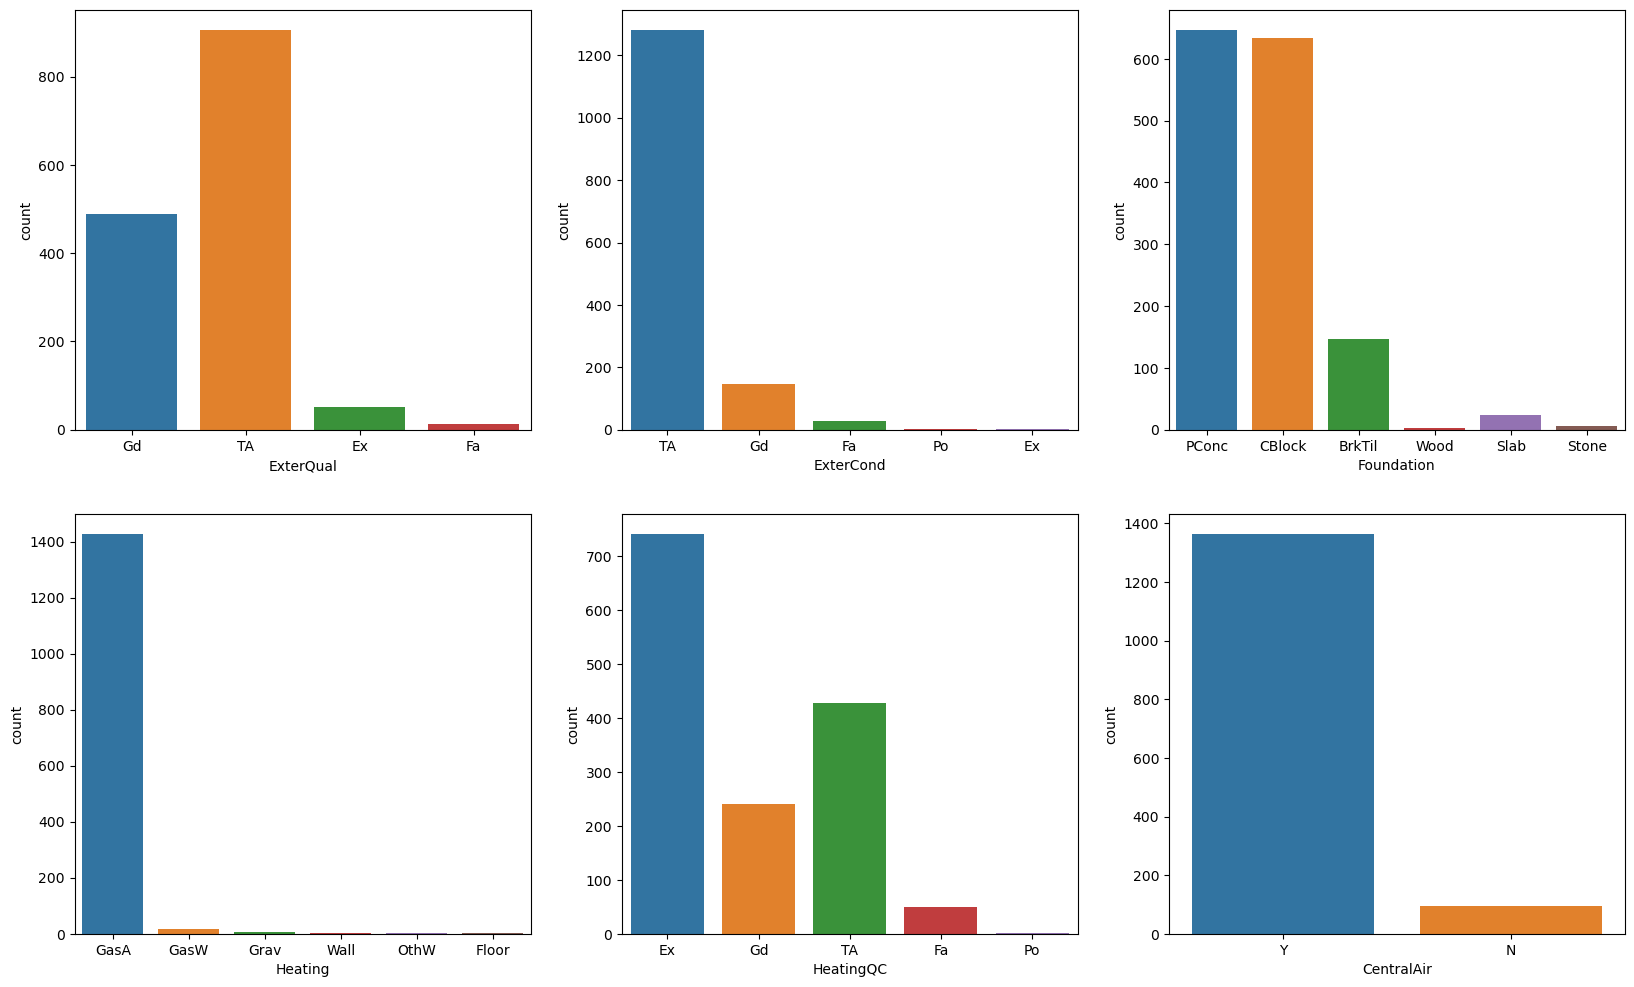

In [114]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = housing_data)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = housing_data)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = housing_data)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = housing_data)
plt.show()


* Majority of ExterQual, ExerCond is TA
* Poured Contrete foundation are the highest in number
* Meanwhile variables like Heating , Central Airand Exter Cond are skewed so would be dropping these variables

In [115]:
housing_data['HeatingQC'].value_counts() # similarly checked for all variables to check the skewness

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [116]:
housing_data['Foundation'] = housing_data['Foundation'].replace(['Slab','Stone','Wood'],'Others')
# Dropping highly skewed column 
housing_data.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

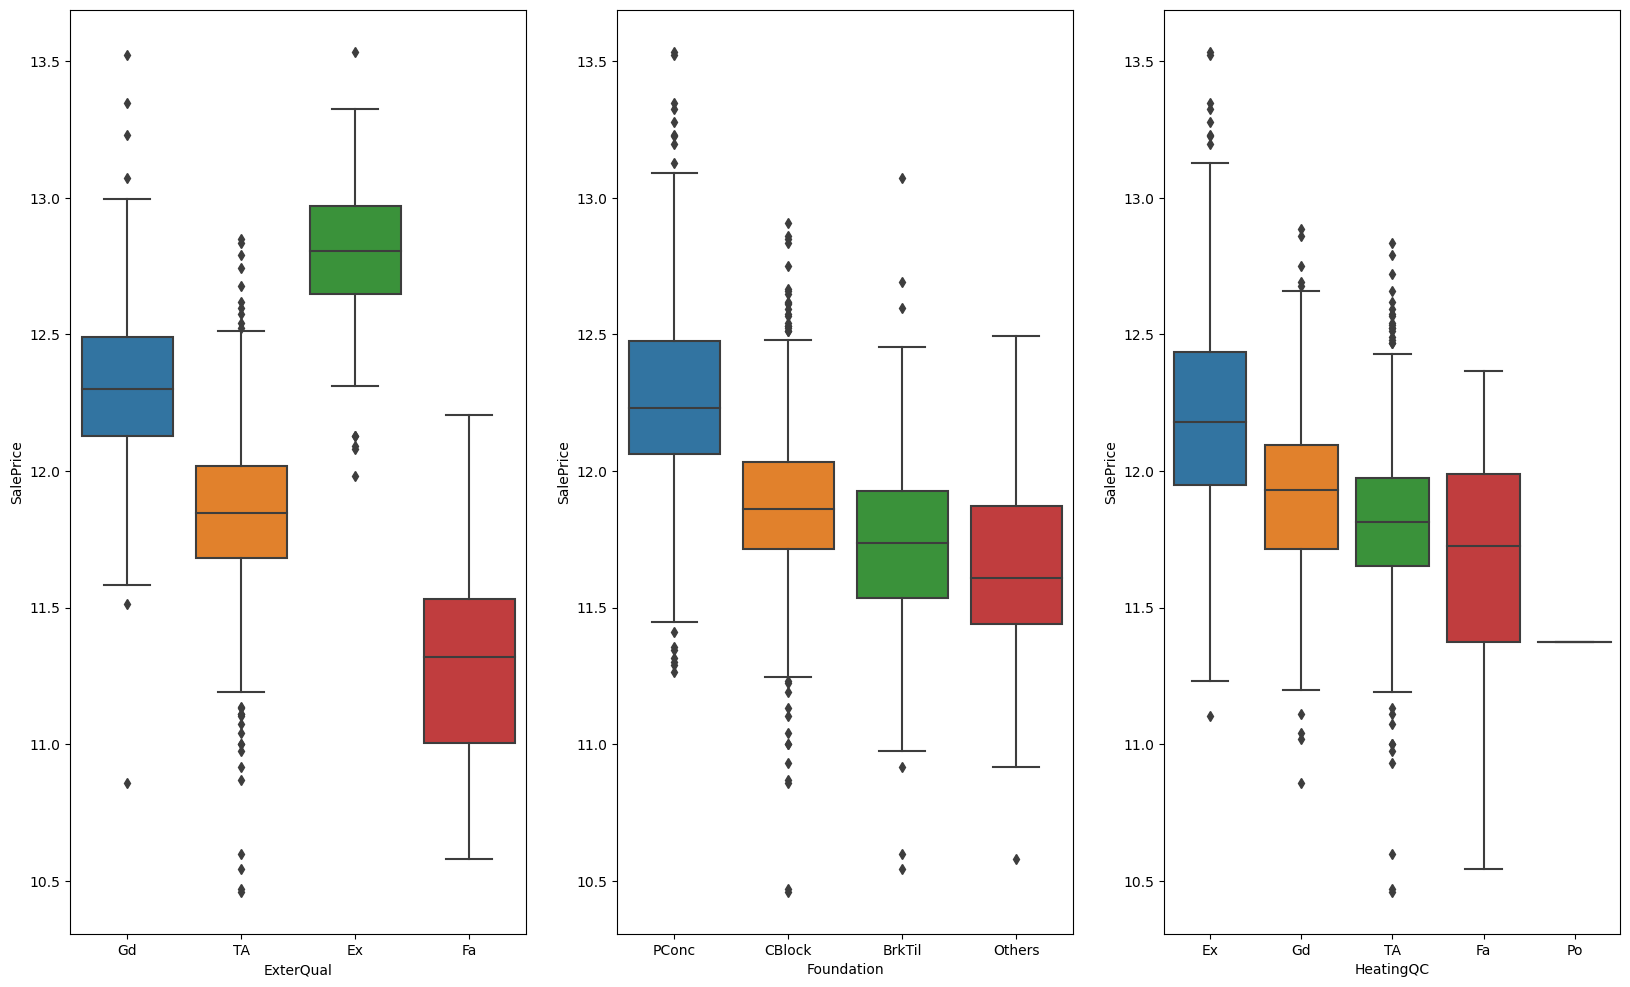

In [117]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = housing_data)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing_data)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing_data)


* Price of Excellent ExterQual and HeatingQc is highest
* Price of Poured Contrete Foundation is highest.

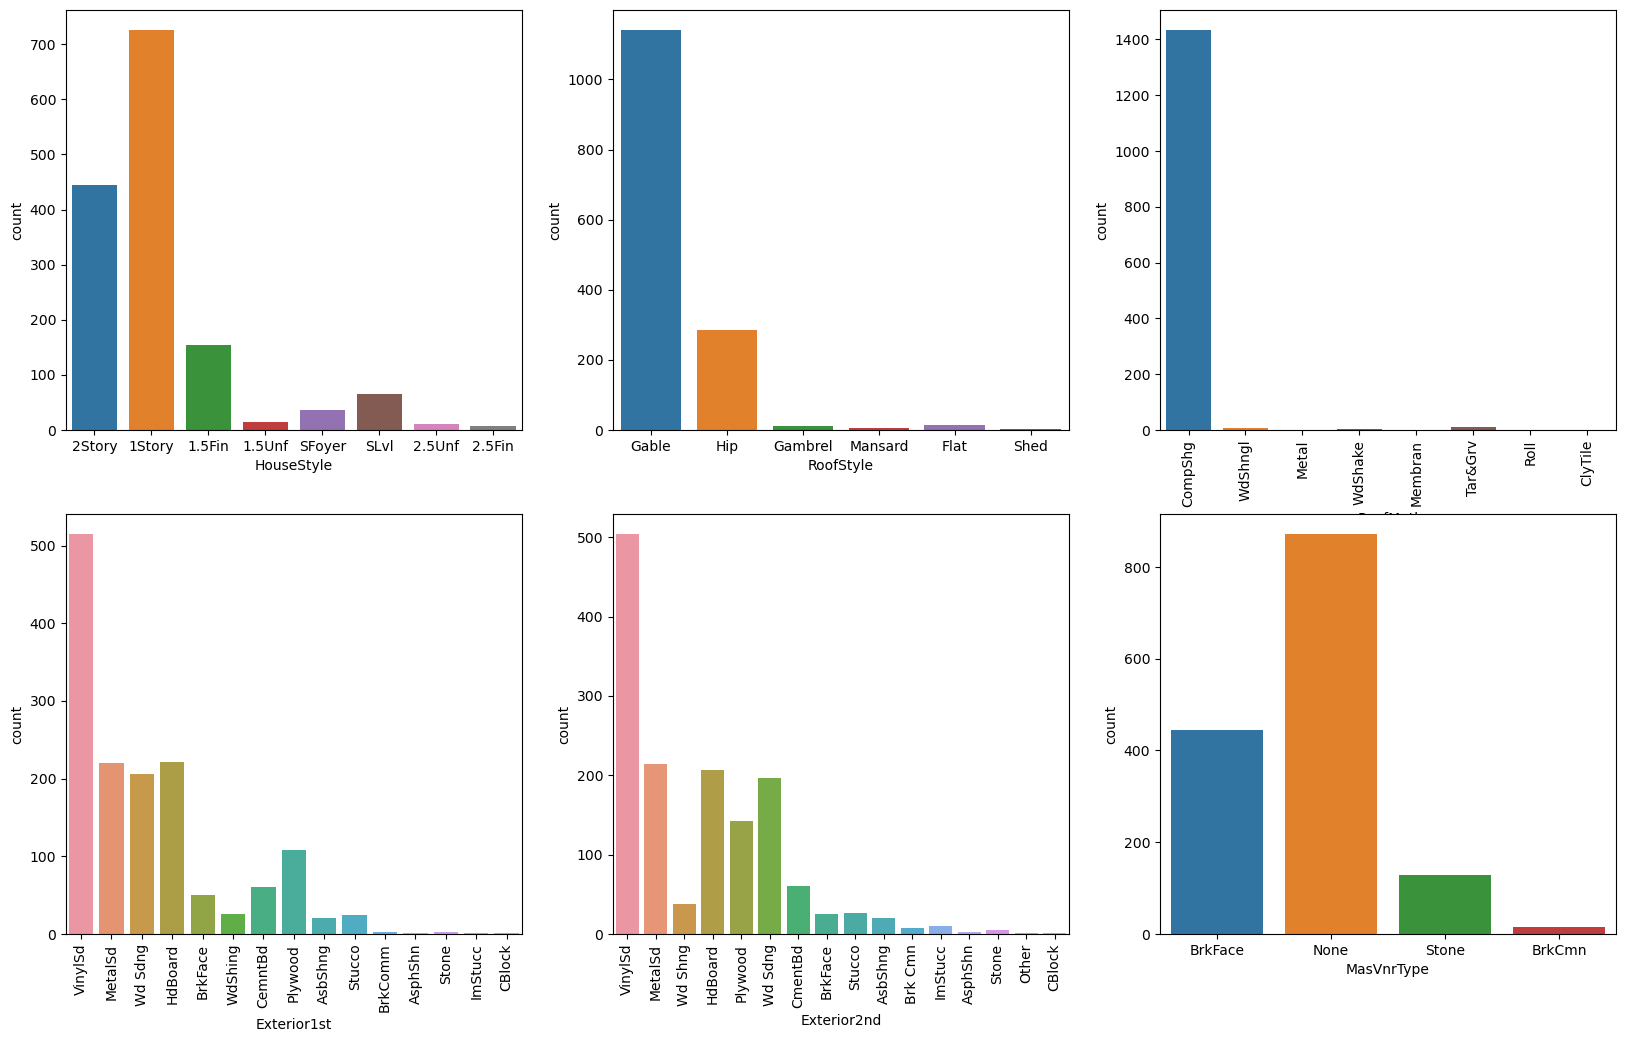

In [118]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing_data)
plt.show()

In [119]:
housing_data['Exterior2nd'].value_counts() #similarly checking the skewness for other columns

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [120]:
housing_data['HouseStyle'] = housing_data['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing_data['RoofStyle'] = housing_data['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing_data['Exterior1st'] = housing_data['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing_data['Exterior2nd'] = housing_data['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

# Dropping highly skewed column 
housing_data.drop(['RoofMatl'],axis=1,inplace=True)


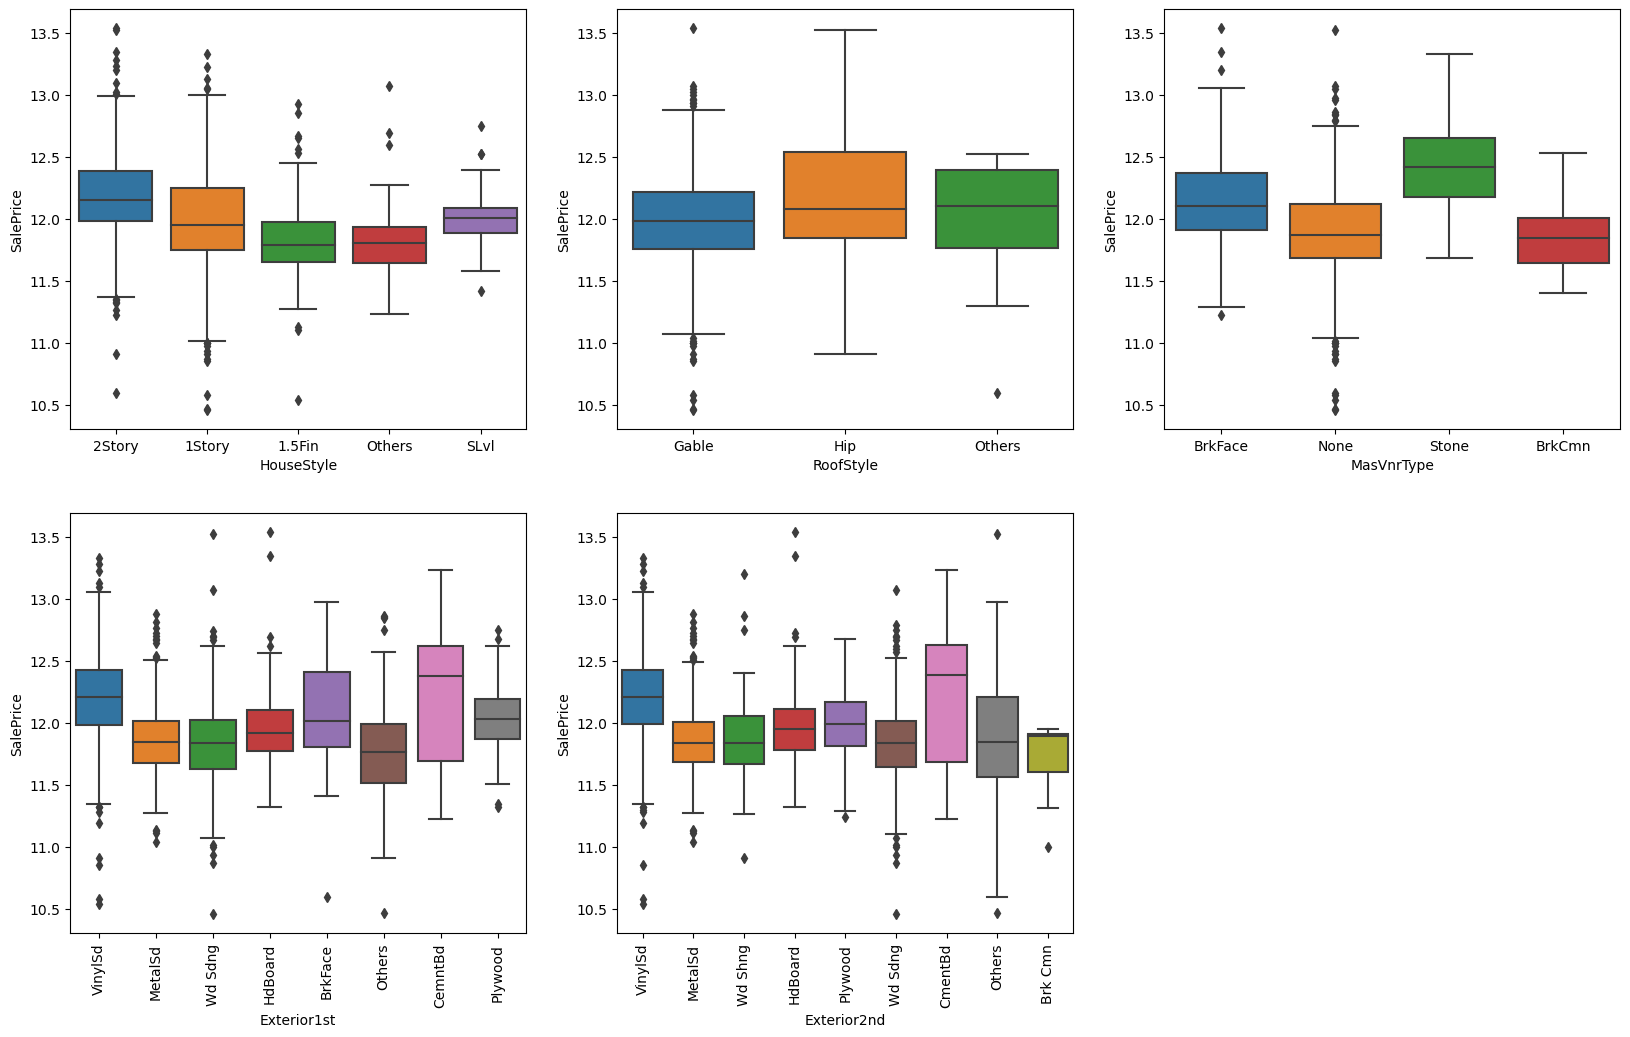

In [121]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing_data)
plt.xticks(rotation=90)
plt.show()


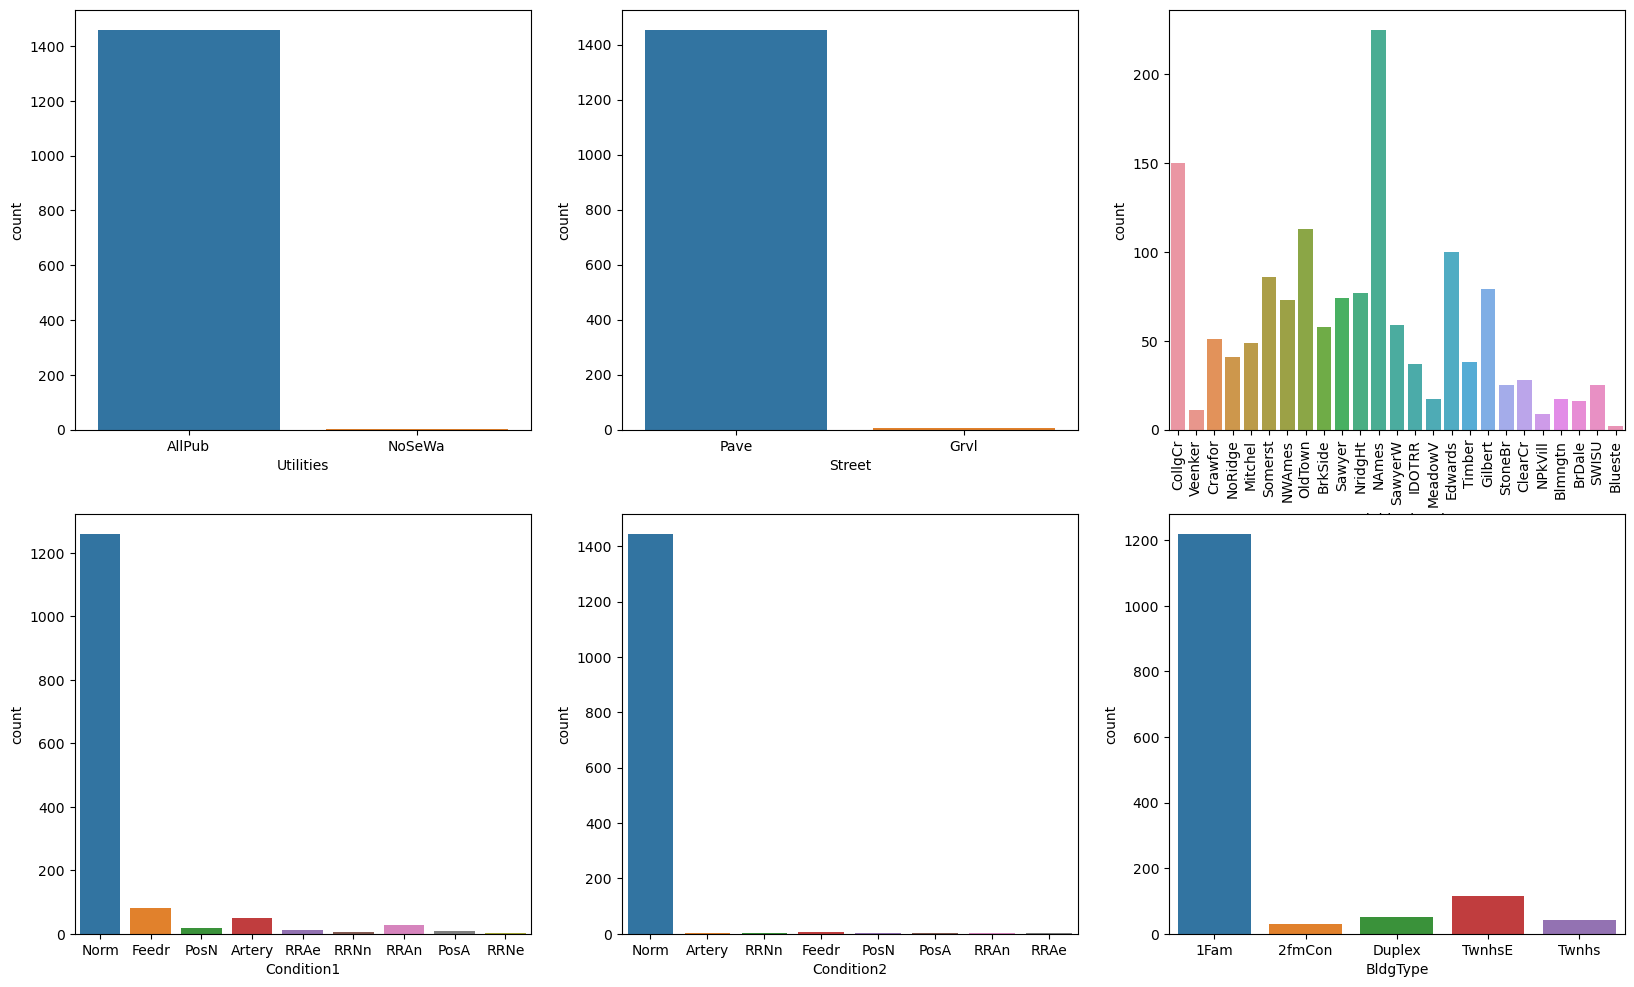

In [122]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing_data)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing_data)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing_data)
plt.show()


<Axes: xlabel='BldgType', ylabel='SalePrice'>

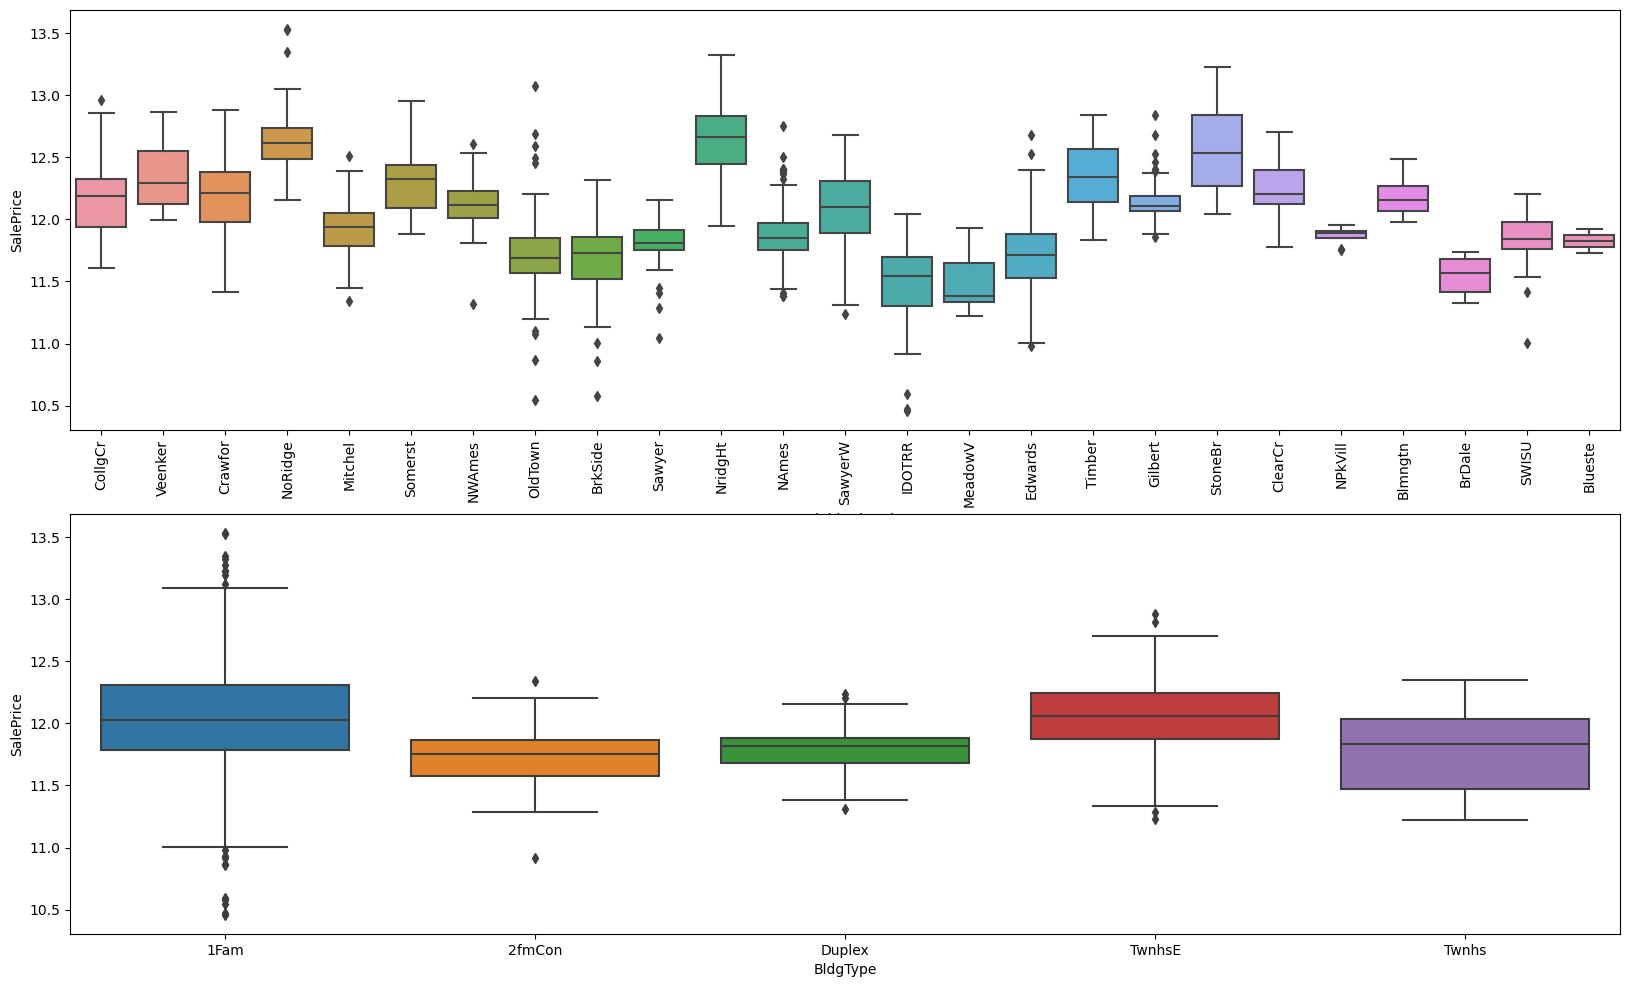

In [123]:
housing_data['BldgType'].value_counts()#similarly checking skewness for other columns

# Dropping highly skewed column 
housing_data.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = housing_data)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing_data)


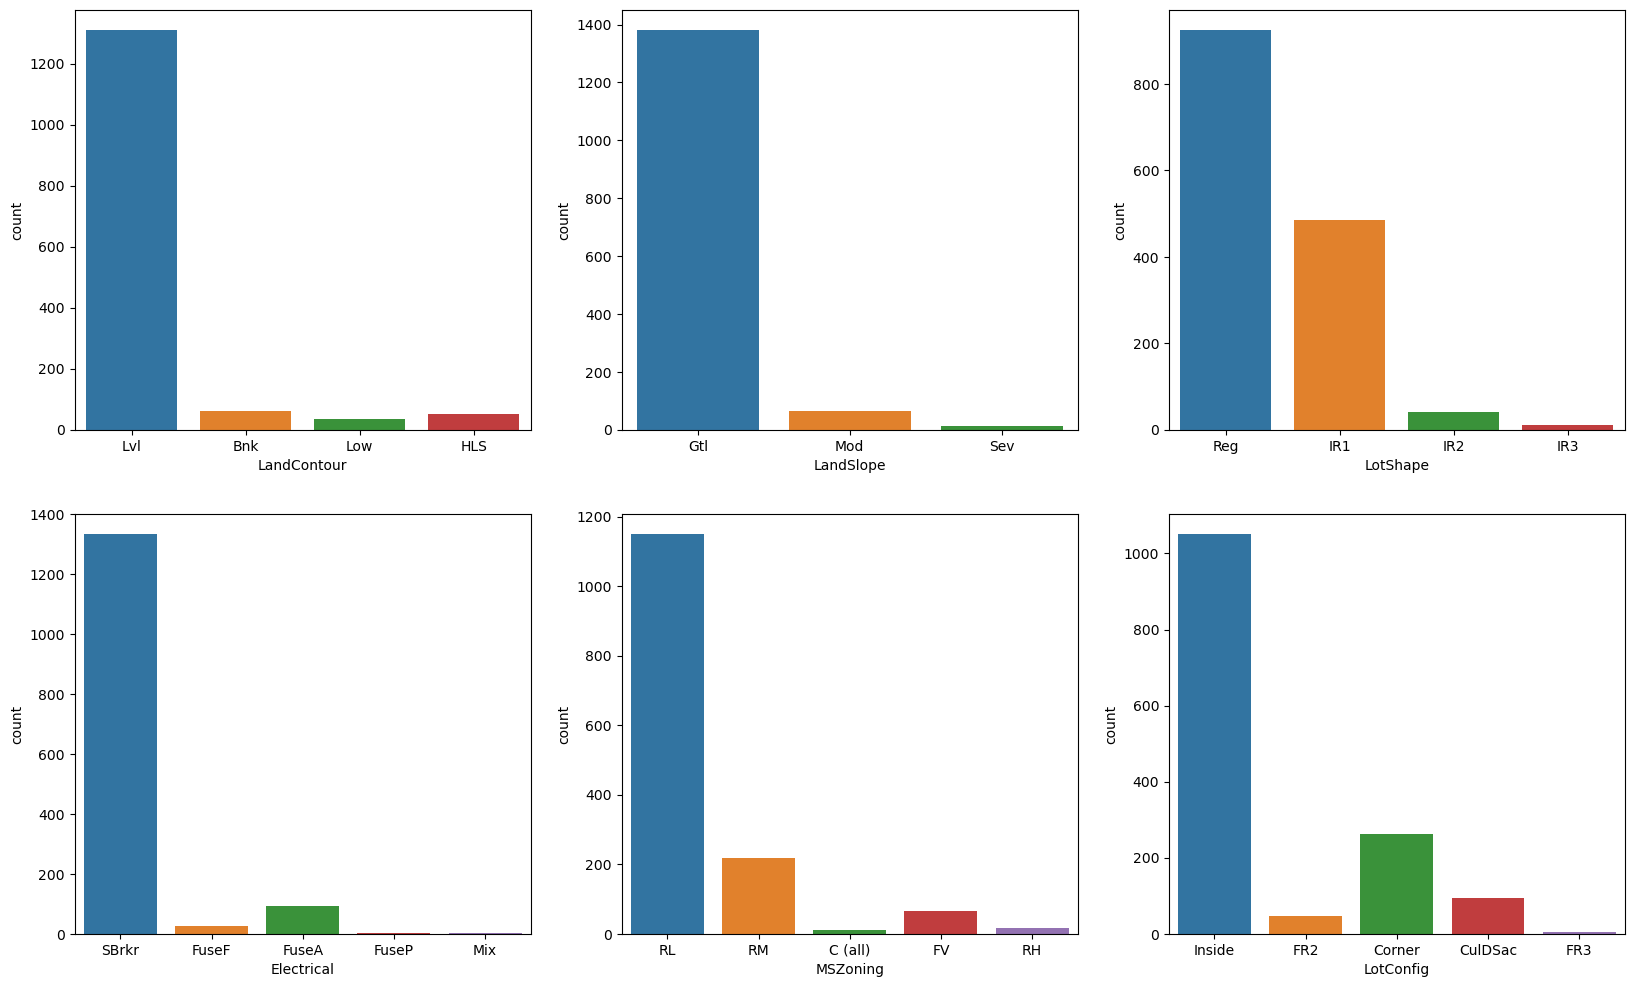

In [124]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = housing_data)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = housing_data)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = housing_data)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = housing_data)
plt.show()


In [125]:
housing_data['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [126]:
housing_data.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

housing_data['MSZoning'] = housing_data['MSZoning'].replace(['RH','C (all)'],'Others')

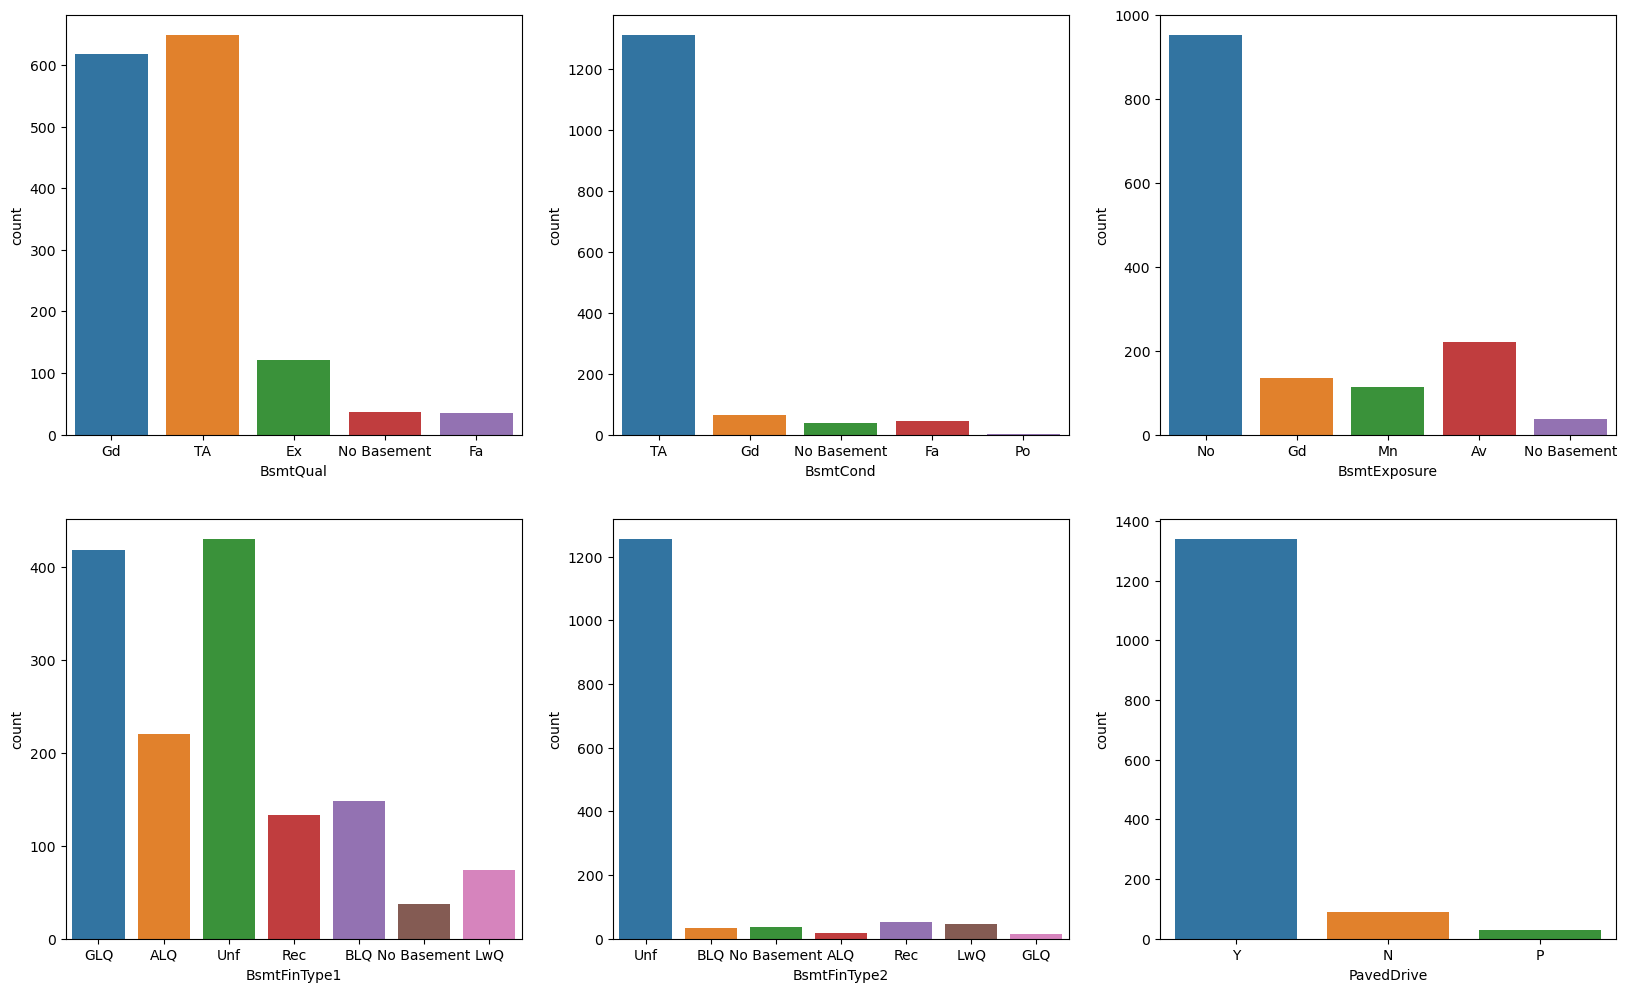

In [127]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = housing_data)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = housing_data)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = housing_data)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = housing_data)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = housing_data)
plt.show()


In [128]:
housing_data['BsmtCond'].value_counts() # similarly checking skewness for other columns

BsmtCond
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: count, dtype: int64

In [129]:
housing_data.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [130]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,Normal,12.429216


In [131]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

ValueError: could not convert string to float: '2-STORY 1946 & NEWER'